## Business Problem

American Mortgage Bank grapples with the complexities of an evolving real estate landscape, navigating through shifting market dynamics and fluctuating trends. As the bank aims to refine its lending strategies, enhance risk assessments, and innovate its suite of mortgage products, it encounters obstacles in deciphering the nuances of the ever-changing market.

In response to these challenges, American Mortgage Bank seeks to harness the power of data-driven insights and advanced analytics to gain a comprehensive understanding of market trends. By leveraging predictive tools and machine learning algorithms, VitaGroup aims to revolutionize the real estate market by providing financial institutions with a deeper understanding of market trends through time series analysis. This insight will inform lending strategies and facilitate innovation in the range of mortgage products offered by the bank.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the data set
df=pd.read_csv("Neighborhood_month.csv")
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29
0,112345,0,Maryvale,neighborhood,AZ,AZ,Phoenix,"Phoenix-Mesa-Chandler, AZ",Maricopa County,67383.031641,...,3.176412e+05,3.194960e+05,3.219764e+05,3.249856e+05,3.276488e+05,3.300777e+05,3.321366e+05,3.337132e+05,3.347330e+05,3.357045e+05
1,192689,1,Paradise,neighborhood,NV,NV,Las Vegas,"Las Vegas-Henderson-Paradise, NV",Clark County,133640.057992,...,3.607395e+05,3.614624e+05,3.632721e+05,3.661695e+05,3.690387e+05,3.715277e+05,3.736861e+05,3.757784e+05,3.776834e+05,3.795126e+05
2,270958,2,Upper West Side,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",New York County,394692.554604,...,1.293743e+06,1.287903e+06,1.281592e+06,1.271799e+06,1.261754e+06,1.250664e+06,1.238787e+06,1.231254e+06,1.225646e+06,1.219479e+06
3,270957,3,Upper East Side,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",New York County,641748.074378,...,1.265151e+06,1.259556e+06,1.255193e+06,1.250717e+06,1.246179e+06,1.237942e+06,1.226768e+06,1.216496e+06,1.209650e+06,1.203629e+06
4,118208,4,South Los Angeles,neighborhood,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,130878.148719,...,6.354036e+05,6.391914e+05,6.465671e+05,6.564532e+05,6.664609e+05,6.749575e+05,6.815551e+05,6.858569e+05,6.835768e+05,6.770799e+05


In [3]:
#getting data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21662 entries, 0 to 21661
Columns: 299 entries, RegionID to 2024-02-29
dtypes: float64(290), int64(2), object(7)
memory usage: 49.4+ MB


In [4]:
#checking shape for the dataset
df.shape

(21662, 299)

## Data Cleaning

To ensure the development of a robust and accurate model, several data cleaning techniques will be applied to the dataset. The following techniques will be employed:

- Completeness: This technique involves addressing missing values within the dataset. Steps will be taken to identify and handle missing data appropriately, either through imputation or removal, to ensure that the dataset is complete.

- Consistency: The consistency of the data will be examined to identify any discrepancies or irregularities. Inconsistencies in variables, such as conflicting formats or conflicting information within the dataset, will be addressed and resolved to maintain data integrity.

- Validity: Validity refers to the accuracy and relevance of the data. Data validation techniques will be applied to verify that the values within each variable align with expected ranges or predefined criteria. Any invalid or erroneous data points will be rectified or removed from the dataset.

- Uniformity: Uniformity is crucial during the data cleaning process to ensure consistency and accurate analysis. Inconsistent or non-uniform data can introduce errors and bias into the modeling process, leading to unreliable results. Robust techniques will be employed to detect and handle non-uniformity effectively, ensuring that the data is standardized and aligned.

By applying these data cleaning techniques, the dataset will be refined and prepared, ensuring the reliability and accuracy of the data before proceeding with the subsequent stages of analysis and modeling.

### Completeness
To achieve completeness in our data, I will be checking for missing values in the data.

In [5]:
# Check for null values
print(f'The data has {df.isna().sum().sum()} missing values')

The data has 1505110 missing values


In [6]:
# Define a function to explore missing data
def missing_data(df):
    missing_data = df.isna().sum()
    missing_data = missing_data[missing_data>0]
    return missing_data.to_frame()

In [7]:
# expanding the number of visible columns
pd.set_option('display.max_columns', None)

In [8]:
# Apply missing_data function to the dataframe
missing_data(df).T

,City,Metro,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,2,14,10478,10400,10389,10380,10316,10303,10294,10270,10261,10252,10247,10211,10007,9943,9831,9804,9797,9787,9774,9748,9696,9660,9644,9634,9516,9507,9500,9327,9275,9093,9077,9061,9045,9030,9020,9015,8837,8827,8811,8797,8756,8748,8686,8485,8442,8401,8385,8379,8228,8222,8236,8191,8193,8177,8163,8105,8071,8063,8021,8009,7766,7741,7740,7729,7722,7709,7704,7658,7647,7640,7629,7604,7450,7440,7438,7432,7411,7400,7387,7355,7334,7345,7346,7303,7087,7079,7074,7069,7058,7044,7035,6950,6926,6902,6886,6873,6706,6696,6699,6708,6700,6671,6653,6633,6609,6514,6487,6475,6013,5916,5895,5883,5871,5862,5854,5850,5839,5833,5831,5819,5627,5619,5615,5610,5607,5590,5576,5562,5553,5547,5542,5526,5396,5396,5389,5387,5388,5384,5377,5368,5372,5345,5333,5312,5024,5010,4998,4994,4978,4966,4952,4924,4896,4877,4850,4810,4364,4347,4330,4316,

- The date columns have 10478 missing values each metro column has 14 missing values while city has 2.

- The missing values in the date columns will be filled through interpolation.
- The missing values in the metro column will be replaced with 'missing' as this may be a useful indicator.
- The missing calues in city column will be droped since it does not cover a higher percentage.

In [9]:
# imputing the missing values by replacing them with 'missing'
df.Metro.fillna('missing', inplace=True)

In [10]:
#drop missing values in the 'City' column
df.dropna(subset=['City'], inplace=True)

In [11]:
# interpolate missing values on date columns
df.interpolate(inplace=True)

In [12]:
# checking to see if missing values have been replaced
print(f'The data has {df.isna().sum().sum()} missing values')

The data has 0 missing values


### Consistency
For the data to be constistent, I need to resolve any inconsistencies by checking for duplicate values in our data.

In [13]:
# checking for duplicates
print(f'The data has {df.duplicated().sum()} duplicates')

The data has 0 duplicates


- The data has no duplicate values

### Validity

For our data to be valid, I have to verify that every column is accurate and appropriate for this analysis and remove those that are invalid.

In [14]:
#validity checks
df.head(2)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29
0,112345,0,Maryvale,neighborhood,AZ,AZ,Phoenix,"Phoenix-Mesa-Chandler, AZ",Maricopa County,67383.031641,67594.528159,67876.303176,68492.532408,69174.305303,69800.457539,70421.136885,71051.780181,71735.008552,72362.307816,72964.869522,73552.527578,74153.196631,74758.925790,75378.089768,75964.876243,76512.540459,76998.708325,77444.604032,77861.418771,78335.805428,78852.272025,79407.318942,79886.223943,80287.318124,80673.299747,81090.978139,81511.538587,81871.363367,82228.883231,82616.778770,83066.909712,83471.328939,83856.974634,84195.961031,84542.84774,84863.049342,85184.362803,85455.290841,85794.777316,86151.639288,86554.870088,86935.835967,87348.756099,87862.947077,88440.516765,88984.482664,89432.937004,89793.043871,9023

In [15]:
#droping statename since we also have state column with the same values
df.drop(columns=['StateName'],inplace=True)

### Uniformity
- For our data to be uniform, I have to verify that every column is correct and convert them to there appropriate data type.

In [16]:
#checking for data types
df.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
State          object
               ...   
2023-10-31    float64
2023-11-30    float64
2023-12-31    float64
2024-01-31    float64
2024-02-29    float64
Length: 298, dtype: object

### Data Preprocessing

#### Feature engineering

To improve our analysis, we will  create new features for more analytical value.

### Return on Investment (ROI)

ROI is a measure of returns expected from investments.

### Coefficient of variation (CV)

CV is a measure of the dispersion of data points around the mean and represents the ratio of the standard deviation to the mean. It allows investors to determine how much volatility, or risk, is assumed in comparison to the amount of return expected from investments.

In [17]:
#calculating and creating ROI column
df['ROI'] = (df['2024-02-29']/ df['2000-01-31'])-1


In [18]:
# Calculate mean and standard deviation along the columns axis (axis=1) for each row
mean_values = df.iloc[:, 9:].mean(axis=1)  
std_values = df.iloc[:, 9:].std(axis=1)

# Calculate coefficient of variation (CV) using the formula
cv_values = (std_values / mean_values) * 100

# Add the CV column to the DataFrame
df['CV'] = cv_values

### Reshape from wide to long format
To facilitate time series analysis, the dataframe will be transformed from a wide view to a long view format. This transformation involves restructuring the dataframe to have a single column for the Date and another column for the corresponding values. The Date column will be set as the index to establish the temporal order of the data points.

By converting the dataframe to a long view format and indexing it by the Date, the data will be organized in a sequential manner, enabling the application of time series analysis techniques such as trend analysis, seasonality detection, and forecasting. This transformation allows for a more comprehensive exploration of the temporal patterns and trends within the dataset, enhancing the accuracy and effectiveness of the subsequent time series modeling and predictions.

In [19]:
# Create a copy of the dataset to convert into long view while preserving df as a wide view for EDA
new_df = df.copy()

In [20]:
# creating a function that changes the dataframe structure from wide view to long view

def melt_df(data):
    melted = pd.melt(data, id_vars=['RegionID','RegionName','RegionType','City', 'State', 'Metro', 'CountyName', 'SizeRank',
                                  'ROI', 'CV' ], var_name='Date')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [21]:
new_df = melt_df(new_df)

#### Convert  data to date time and indexing
Working with time series data in Python, having dates (or datetimes) in the index can be very helpful, especially if they are of DatetimeIndex type as the index allows for intuitive and efficient time-based indexing and slicing operations. It enables easy access to specific time periods, such as a particular day, month, or year. Additionally, the DatetimeIndex provides convenient methods for resampling, time shifting, and frequency conversion.

In [22]:
# Converting the date data type into date time and indexing
new_df['Date']=pd.to_datetime(new_df['Date'],format='%m/%y')

# Set the 'Date' column as index
new_df.set_index('Date',inplace=True)

In [23]:
# renaming the column value to Homevalue
new_df.rename(columns = {"value" : "Homevalue"}, inplace=True)

In [24]:
#displaying the final data
new_df.head()

,RegionID,RegionName,RegionType,City,State,Metro,CountyName,SizeRank,ROI,CV,Homevalue
Date,,,,,,,,,,,
2000-01-31,112345,Maryvale,neighborhood,Phoenix,AZ,"Phoenix-Mesa-Chandler, AZ",Maricopa County,0,3.982033,59.394305,67383.031641
2000-01-31,192689,Paradise,neighborhood,Las Vegas,NV,"Las Vegas-Henderson-Paradise, NV",Clark County,1,1.839812,38.067356,133640.057992
2000-01-31,270958,Upper West Side,neighborhood,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York County,2,2.089694,29.376597,394692.554604
2000-01-31,270957,Upper East Side,neighborhood,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York County,3,0.875548,19.879574,641748.074378
2000-01-31,118208,South Los Angeles,neighborhood,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,4,4.173361,48.362609,130878.148719


### Exploratory Data Analysis

This section will be the exploratory data analysis question where we will exploring and seeing the relationship the different columns

Exploration will be done on the data to determine:

1. The top 10 RegionName with highest ROI
2. The RegionName with high price volatility
3. The states with highest valued property


In [25]:
#creating categorical columns
categorical_columns_list = ['RegionName', 'City','RegionType','State', 'Metro', 'CountyName']
categorical_columns_df = new_df[['RegionName', 'City', 'RegionType','State', 'Metro', 'CountyName']]

#creating numerical columns
numerical_columns_list = ['RegionID', 'SizeRank', 'ROI', 'CV', 'Homevalue']
numerical_columns_df = new_df[['RegionID', 'SizeRank', 'ROI', 'CV', 'Homevalue']]

#### Catergorical Univariate Analysis

In [26]:
def plot_most_popular_categorical(df, column, n=10, figsize=(8, 6)):
    """
    Plots the most popular datasets based on a given column in the dataset.

    Args:
        df (DataFrame): The pandas DataFrame containing the data.
        column (str): The column to consider for counting.
        n (int): The number of counties to plot (default: 10).
        figsize (tuple): The figure size (default: (15, 8)).
    """
    plt.figure(figsize=figsize)
    df[column].value_counts()[:n].plot(kind="barh")
    plt.xlabel("Count", fontsize=15)
    plt.ylabel(column, fontsize=15)
    plt.title(f"Most Popular {column.capitalize()}s", fontsize=20)
    plt.show()

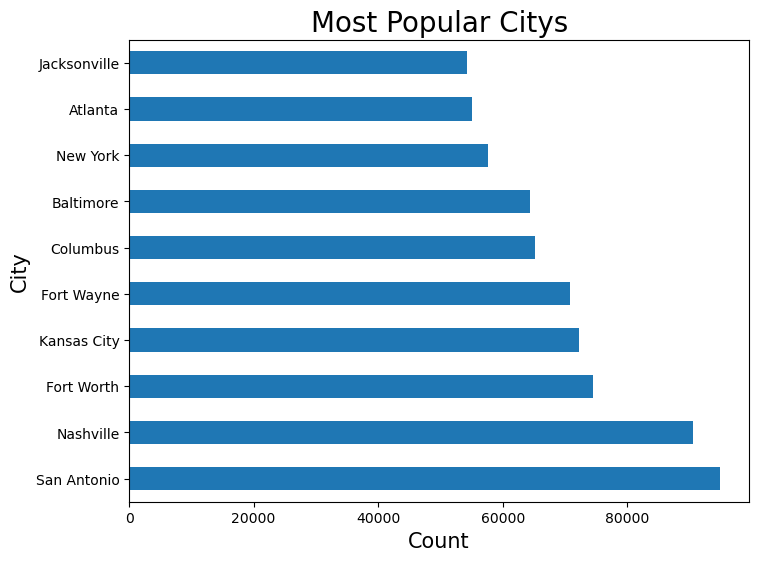

In [27]:
#What are the top 10 most popular cities?
plot_most_popular_categorical(new_df, "City")

- By analyzing this graph, you can identify the cities that have the highest representation in the dataset. The taller bars indicate cities with a larger number of properties, while shorter bars indicate cities with fewer properties in the dataset.

#### What are the top 10 most popular Metro?

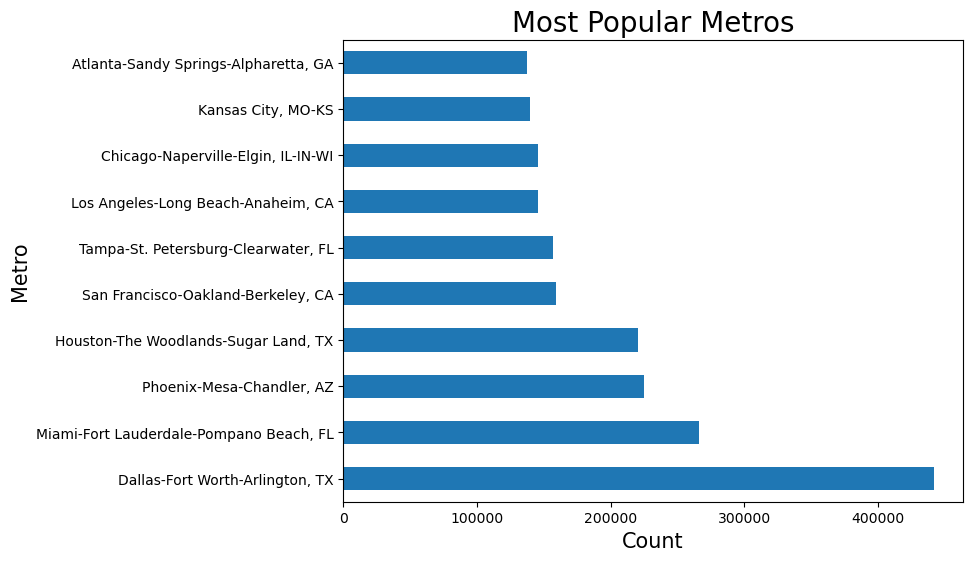

In [28]:
plot_most_popular_categorical(new_df, "Metro")

- An overview of the most popular metro areas based on property counts. The plot helps identify the metros with the highest concentration of properties, indicating areas of high real estate activity. It also allows for a comparison of property distribution among different metro areas, highlighting any significant variations.

#### What are the top 10 most popular counties

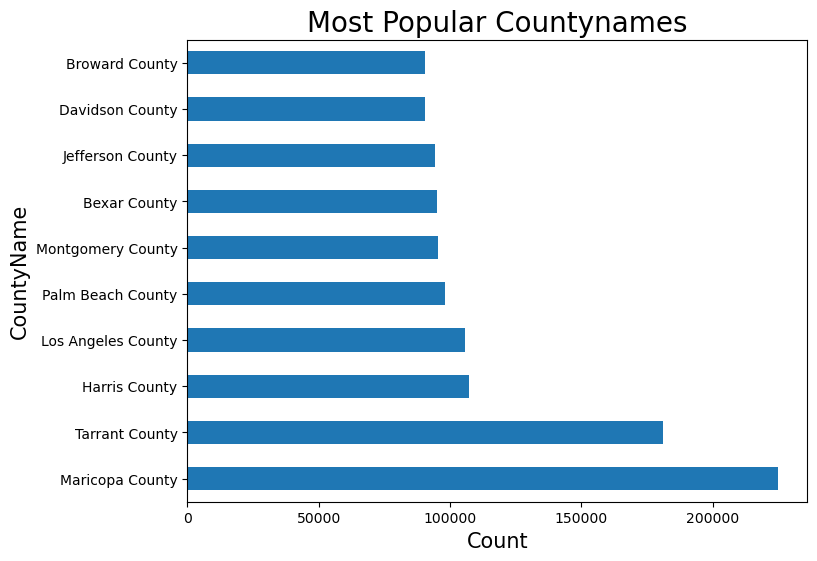

In [29]:
plot_most_popular_categorical(new_df, "CountyName")

- Representation of the most popular counties based on property counts. The plot enables the identification of counties with the highest number of properties, providing insights into areas of concentrated real estate activity. It also allows for a comparison of property distribution among different counties, highlighting any notable discrepancies.

#### Numerical Univariate analysis

In [30]:
numerical_columns_df.head(2)

,RegionID,SizeRank,ROI,CV,Homevalue
Date,,,,,
2000-01-31,112345,0,3.982033,59.394305,67383.031641
2000-01-31,192689,1,1.839812,38.067356,133640.057992


In [31]:
def plot_distribution(df, column):
    """
    Plots the distribution of a specified column in a DataFrame.

    Args:
        df (DataFrame): The pandas DataFrame containing the data.
        column (str): The column name for which to plot the distribution.

    """
    plt.figure(figsize=(16, 8))
    sns.distplot(np.array(df[column]), kde=True)
    plt.suptitle(f"The Distribution of {column}")
    plt.show()

#### What is the distribution of ROI?

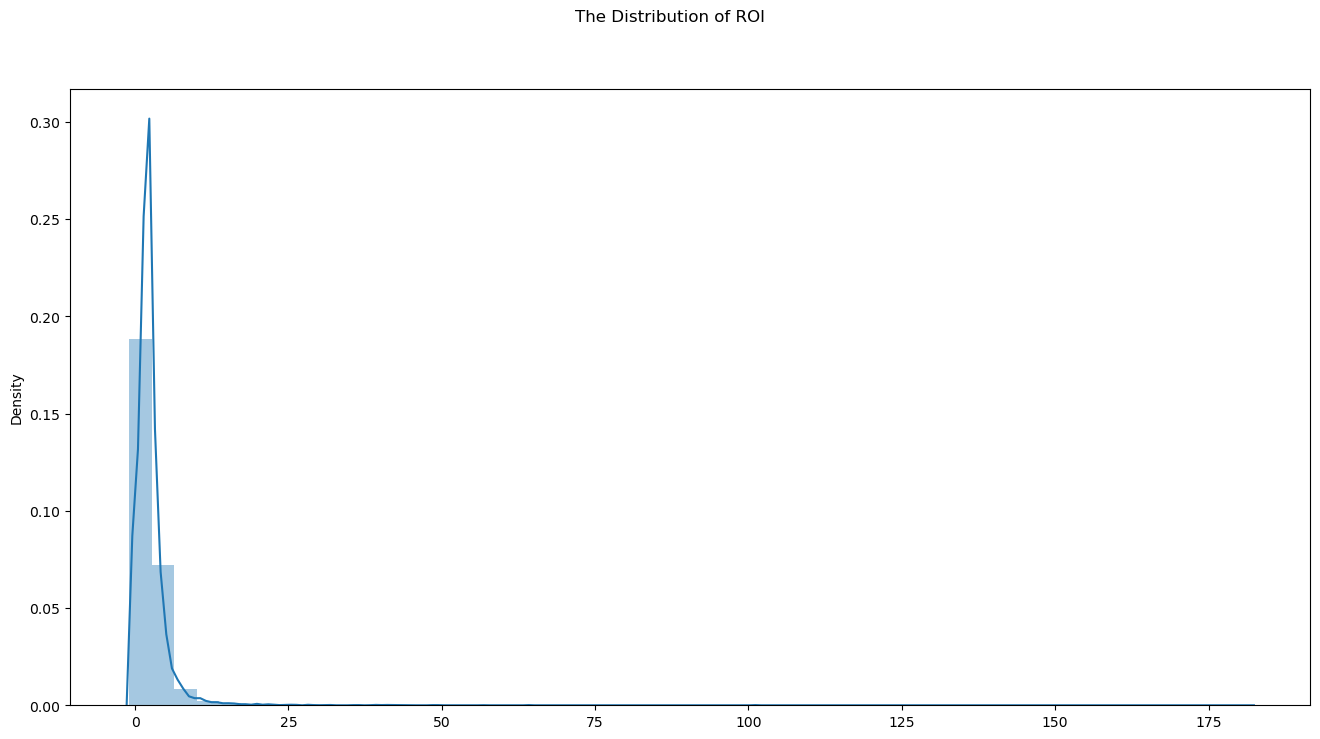

In [32]:
plot_distribution(new_df, 'ROI')

- The distribution of ROI (Return on Investment) appears to be right-skewed, as indicated by the long tail on the right side of the distribution. The majority of the ROI values are concentrated around lower values, with a few extreme values on the higher end. This suggests that most properties in the dataset have relatively lower returns, while a small number of properties have significantly higher returns.

#### What is the distribution of Homevalue?

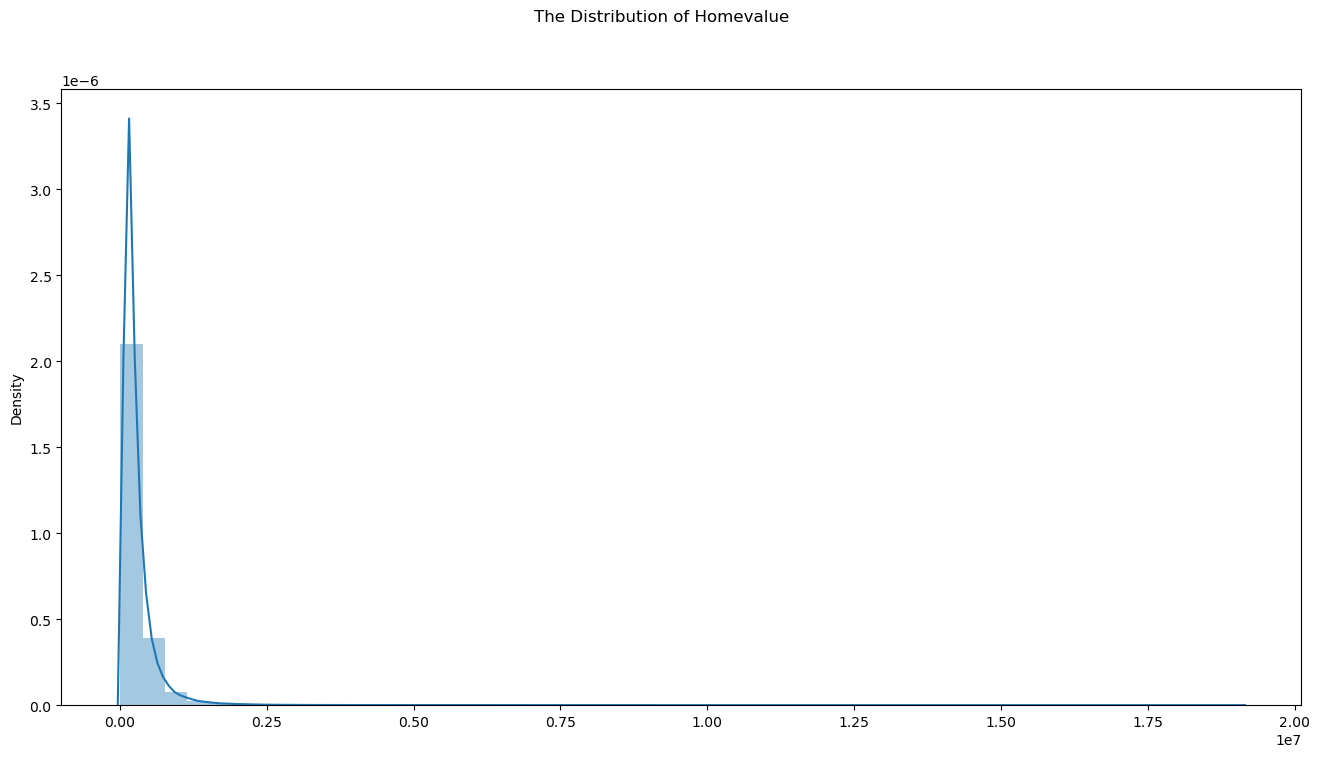

In [33]:
plot_distribution(new_df, 'Homevalue')

#### The top 10 Regionnames with highest ROI

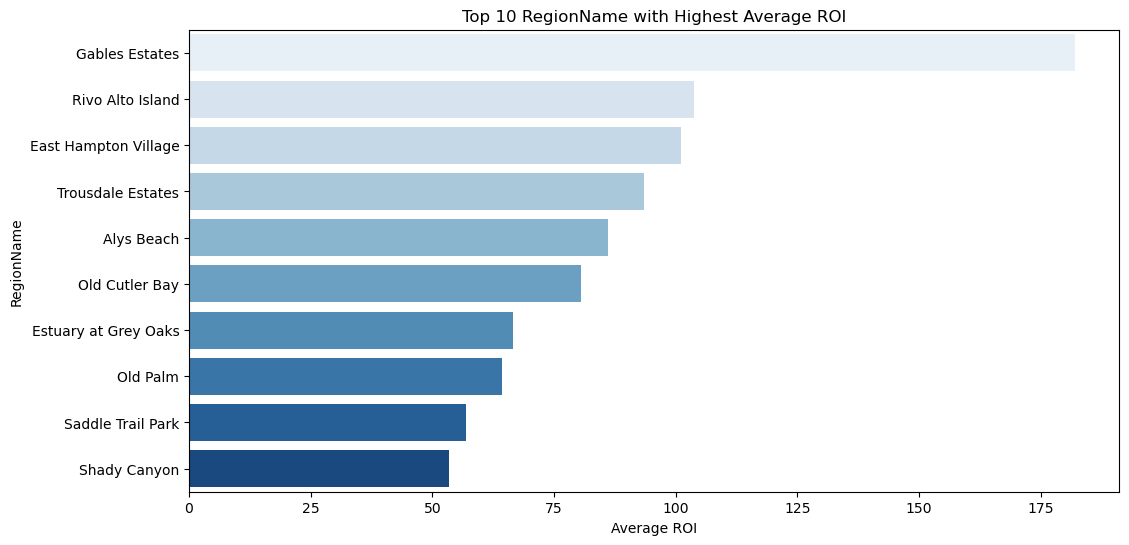

In [34]:
# Calculate average ROI for each zip code
avg_roi_by_Regionnames = new_df.groupby('RegionName')['ROI'].mean().reset_index()

# Sort the zip codes by average ROI in descending order
sorted_Regionnames = avg_roi_by_Regionnames.sort_values(by='ROI', ascending=False)

# Plotting the relationship between ROI and zip codes
plt.figure(figsize=(12, 6))
sns.barplot(x='ROI', y='RegionName', data=sorted_Regionnames[:10], palette='Blues')
plt.xlabel('Average ROI')
plt.ylabel('RegionName')
plt.title('Top 10 RegionName with Highest Average ROI')
plt.show()

- The graph shows the top 10 regions in the United States with the highest average ROI. The region with the highest average ROI is Gables Estates, followed by Rivo Alto Island and East Hampton Village. The region with the lowest average ROI on the graph is Shady Canyon

#### Top 10 Regionnames with the highest price volatility

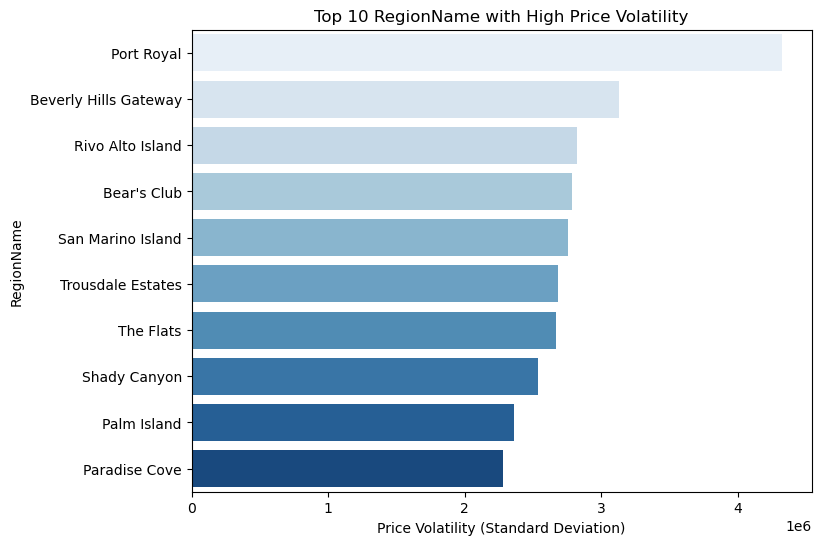

In [35]:
# Calculate the standard deviation of median house prices for each zip code/location
price_volatility_by_Regionnames = new_df.groupby('RegionName')['Homevalue'].std().reset_index()

# Sort the zip codes/locations by price volatility in descending order
sorted_Regionnames_volatility = price_volatility_by_Regionnames.sort_values(by='Homevalue', ascending=False)

# Plotting the relationship between zip codes/locations and price volatility
plt.figure(figsize=(8, 6))
sns.barplot(x='Homevalue', y='RegionName', data=sorted_Regionnames_volatility[:10], palette='Blues')
plt.xlabel('Price Volatility (Standard Deviation)')
plt.ylabel('RegionName')
plt.title('Top 10 RegionName with High Price Volatility')
plt.show()

- The graph shows that Port Royal has the highest price volatility, followed by Beverly Hills Gateway and Rivo Alto Island. Paradise Cove has the lowest price volatility.there is a significant variation in price volatility across these regions.

#### The states with highest valued property

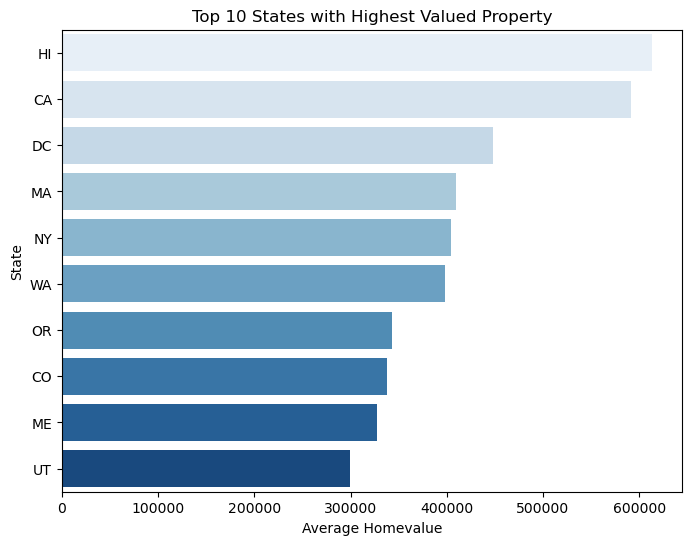

In [38]:
# Calculate the average median house price for each city/state
avg_price_by_state = new_df.groupby('State')['Homevalue'].mean().reset_index()

# Sort the cities/states by average median house price in descending order
sorted_states = avg_price_by_state.sort_values(by='Homevalue', ascending=False)

# Plotting the states with the highest valued property
plt.figure(figsize=(8, 6))
sns.barplot(x='Homevalue', y='State', data=sorted_states[:10], palette='Blues')
plt.xlabel('Average Homevalue')
plt.ylabel('State')
plt.title('Top 10 States with Highest Valued Property')
plt.show()

- The graph shows the average home value in the top 10 states with the highest valued property. The state with the highest average home value is Hawaii, at around $530,000.


#### Multivariate

Our aim here is to look for the relationship between different features

First we look at the correlation of the numeric columns using Pearson's coefficient

In [37]:
# Pearson coefficient of numeric columns
numerical_columns_df = new_df[['RegionID', 'SizeRank', 'ROI', 'CV', 'Homevalue']]
numerical_columns_df.corr()

,RegionID,SizeRank,ROI,CV,Homevalue
RegionID,1.000000,0.291553,0.044972,0.051703,-0.010337
SizeRank,0.291553,1.000000,0.030093,0.080725,-0.016385
ROI,0.044972,0.030093,1.000000,0.481344,0.176618
CV,0.051703,0.080725,0.481344,1.000000,-0.003846
Homevalue,-0.010337,-0.016385,0.176618,-0.003846,1.000000


- The correlation between RegionID and SizeRank is 0.291553, suggesting a moderate positive correlation, indicating that as RegionID increases, SizeRank tends to increase as well, but not perfectly.
- The correlation between ROI and CV is 0.481344, indicating a moderate positive correlation. This suggests that regions with higher return on investment tend to have higher variability in their data.
- The correlation between ROI and Homevalue is 0.176618, indicating a relatively weak positive correlation.
- The correlation between CV and Homevalue is -0.003846, indicating a very weak negative correlation, suggesting that there's almost no relationship between the coefficient of variation and home values.

### MODELLING